# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys, and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [1]:
#Standard setup
import pandas as pd
import numpy as np

# Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [2]:
!curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

!unzip -o ml-latest-small.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  955k  100  955k    0     0   168k      0  0:00:05  0:00:05 --:--:--  270k
Archive:  ml-latest-small.zip
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df["title"]

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[["movieId", "title"]]

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)
...,...,...
9737,m193581,Black Butler: Book of the Atlantic (2017)
9738,m193583,No Game No Life: Zero (2017)
9739,m193585,Flint (2017)
9740,m193587,Bungo Stray Dogs: Dead Apple (2018)


 - Select rows based on one or more conditions

In [7]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065




Lets practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [8]:
# add your solution here
len(ratings_df['userId'].unique()) # 610

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [9]:
# add your solutions here
ratings_df.groupby(["userId"]).mean()["rating"]

userId
u1      4.366379
u10     3.278571
u100    3.945946
u101    3.557377
u102    3.357143
          ...   
u95     4.062500
u96     3.884615
u97     4.194444
u98     3.913043
u99     3.867925
Name: rating, Length: 610, dtype: float64

In [10]:
ratings_df.groupby(["userId"]).mean()["rating"].loc["u200"]

3.809880239520958

## Task 3. What is the average number of ratings per-user? 

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [11]:
# add your solution here
ratings_df.groupby(['userId'])['rating'].count().mean() # 165.3049

165.30491803278687

## Analysing users's preferences.

Lets try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Lets do this for userId 556.


In [12]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'], 
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy
4,u556,m5816,4.5,1534320982,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy
23,u556,m88125,4.5,1534320986,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
13,u556,m49649,4.5,1534321075,Eragon (2006),Action|Adventure|Fantasy
18,u556,m72998,4.0,1534321171,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
30,u556,m162600,4.0,1534321200,Miss Peregrine's Home for Peculiar Children (2...,Fantasy


This user is pretty into adventure/fantasies. 

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u7 rated positively ($\geq 4$)? 

 - How many movies with "Fantasy" genre have u556 rated positively ($\geq 4$)? 

 - What percentage of ALL of u556's ratings are positive ratings ($\geq 4$)  AND for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [13]:
# add your solution here
# all movies u556, u7 rating >= 4
result_df = pd.merge(
    ratings_df[((ratings_df["userId"] == "u556") | (ratings_df["userId"] == "u7")) 
               & (ratings_df["rating"] >= 4)],
    movies_df, 
    on=["movieId"]).sort_values(by="rating", ascending=False)
# genre contains "Fantasy"
print("Fantasy u7 rated positively:", len(result_df[(result_df["genres"].str.contains("Fantasy")) & (result_df["userId"] == "u7")]))
print("Fantasy u556 rated positively:", len(result_df[(result_df["genres"].str.contains("Fantasy")) & (result_df["userId"] == "u556")]))
# userId == u556 and rating >= 4 and genre contains "Fantasy"
percent = len(result_df[(result_df["userId"] == "u556") & (result_df["rating"] >= 4) 
          & (result_df["genres"].str.contains("Fantasy"))]) / len(ratings_df[ratings_df["userId"] == "u556"])
print("Percentage is:", percent)

Fantasy u7 rated positively: 11
Fantasy u556 rated positively: 22
Percentage is: 0.6875


# Part B. Popularity-based Recomendation

Now lets examine the ratings of movies. 

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [14]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


## Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints: 
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

You will need to analyse this graph in the quiz.

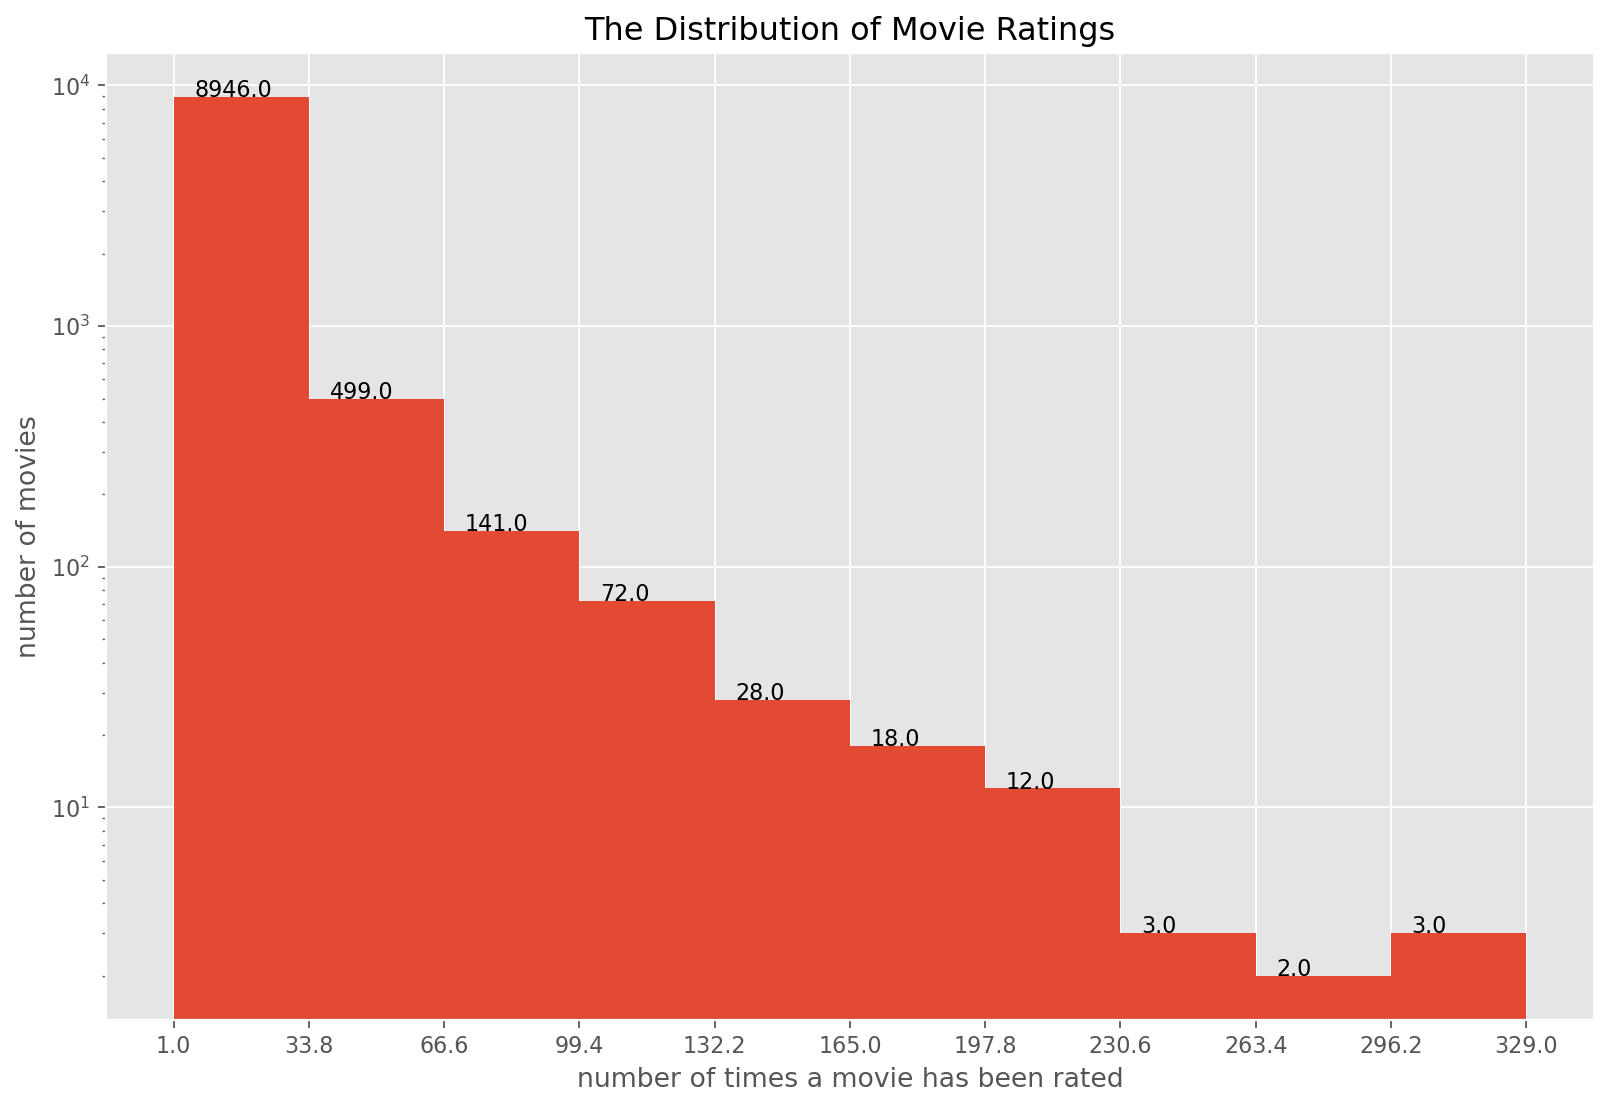

In [15]:
# add your solution here
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 160
# plot the histgram
counts, bins, _ = plt.hist(groupingCountSeries["rating"], log=True)
plt.title("The Distribution of Movie Ratings")
plt.xlabel("number of times a movie has been rated")
plt.xticks(bins)
plt.ylabel("number of movies")
# display the counts of each bin
for i in range(10):
    plt.text(bins[i]+5,counts[i],str(counts[i]))
plt.savefig("disMovieRate.png")


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings?

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [16]:
# add your solution here
# group by movieId
group_df = ratings_df.groupby(["movieId"]).rating.describe()
# merge movieId, movie name, avg rating, counts
highest_df = pd.merge(group_df[["count", "mean"]],
                      movies_df[["movieId", "title"]],
                      on="movieId").sort_values(by="mean", ascending=False)
highest_df = highest_df[highest_df["mean"] == 5]
highest_df.head()

,movieId,count,mean,title
1911,m167064,1.0,5.0,I Am Not Your Negro (2017)
1240,m138966,1.0,5.0,Nasu: Summer in Andalusia (2003)
6243,m53578,1.0,5.0,"Valet, The (La doublure) (2006)"
1254,m139640,1.0,5.0,Ooops! Noah is Gone... (2015)
8567,m79897,1.0,5.0,Get Low (2009)


In [17]:
highest_df[highest_df["movieId"] == "m6442"]
len(highest_df)

296

You can nosw answer the question in the quiz for Task 6, based on your  observations on analysing this table?

# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity. 

Lets take all of the positive ratings (4 or 5), and find the most popular pairs of movies that users have watched.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [18]:
positives = ratings_df[ratings_df["rating"]>=4]

#join positives with itself on userId to get all pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])

#we only want A->B, not B->A. Use the timestamps to restrict the selected pairs
sequences = pairs[pairs["timestamp_x"] < pairs["timestamp_y"]] 

#lets count the frequency of each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

#sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

#display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1574483,m318,m356,104
1416644,m296,m593,92
1416033,m296,m47,91
1187221,m260,m1196,91
1575263,m318,m527,90


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`?

You will need to analyse this dataframe to complete questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [19]:
pairswithcounts[pairswithcounts["count"] == 74]

,movieId_x,movieId_y,count
3273787,m858,m1221,74


In [20]:
#add your solution here
# merge on movieId_x
pairswithcounts = pairswithcounts.merge(right=movies_df, left_on=["movieId_x"], 
                                        right_on="movieId", how="left")
# remove duplicate columns
pairswithcounts = pairswithcounts.drop(columns=["movieId"])
# merge on movieId_y
pairswithcounts = pairswithcounts.merge(right=movies_df, left_on=["movieId_y"],
                                        right_on="movieId", how="left",
                                        suffixes=("_x", "_y"))
# remove duplicate columns
pairswithcounts = pairswithcounts.drop(columns=["movieId"])
pairswithcounts.head()

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y
0,m318,m356,104,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War
1,m296,m593,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
2,m296,m47,91,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
3,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
4,m318,m527,90,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War


## Task 8. Calculate Lift (see Lecture 3) for all pairs in `paircounts`.  

Your target dataframe should have columns: 
 - movieId_x	movieId_y	
 - count - count of movies x & y occurring in a profile	
 - ratingCount_x	ratingCount_y	- how many times these movies appeared in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success. 

Hints: 
 - You will need to join toppairs with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - My solution had duplicated columns. I used this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - It might be useful to [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


If your solution is correct, you will see the highest lift movie pairs. 
Lets check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy). 

It should be clear that these lift pairs do not have high support. 

In [21]:
# counts of all positive ratings
positives_count = positives[["movieId", "rating"]].groupby(["movieId"]).count()
# merge with rating count x and y
pairswithcounts = pairswithcounts.merge(right=positives_count, 
                                        left_on="movieId_x", right_on="movieId",
                                        how="left")
pairswithcounts = pairswithcounts.merge(right=positives_count, 
                                        left_on="movieId_y", right_on="movieId",
                                        how="left", suffixes=("_x", "_y"))
# compute Lift
pairswithcounts['lift'] = ((pairswithcounts["count"] / 610) 
                           / ((pairswithcounts["rating_x"] / 610) 
                              * (pairswithcounts["rating_y"] / 610)))
pairswithcounts.sort_values(by="lift", ascending=False)
pairswithcounts[(pairswithcounts["title_x"].str.contains("Pink Panther, The")) & (pairswithcounts["title_y"].str.contains("For Richer or Poorer"))]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
1145455,m43836,m1703,1,"Pink Panther, The (2006)",Adventure|Comedy|Crime,For Richer or Poorer (1997),Comedy,1,1,610.0


In [22]:
pairswithcounts[(pairswithcounts["movieId_x"] == "m1475") & (pairswithcounts["movieId_y"] == "m2024")]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
2137902,m1475,m2024,1,Kama Sutra: A Tale of Love (1996),Romance,"Rapture, The (1991)",Drama|Mystery,1,1,610.0


In [23]:
pairswithcounts[(pairswithcounts["movieId_x"] == "m91500") & (pairswithcounts["movieId_y"] == "m106487")]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
27070,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,18.154762


## Task 9 - Support Thresholds

Removing movie pairs with support count $< 10$.

I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing! 

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [24]:
# add your solution here
# remove pairs count < 10
finalpairs = pairswithcounts[pairswithcounts["count"] >= 10]
# sort by Lift
finalpairs.sort_values(by="lift", ascending=False).head()

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
20414,m91500,m116823,11,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Mockingjay - Part 1 (2014),Adventure|Sci-Fi|Thriller,24,15,18.638889
27070,m91500,m106487,10,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,24,14,18.154762
27867,m115713,m139385,10,Ex Machina (2015),Drama|Sci-Fi|Thriller,The Revenant (2015),Adventure|Drama,20,19,16.052632
26869,m91658,m67255,10,"Girl with the Dragon Tattoo, The (2011)",Drama|Thriller,"Girl with the Dragon Tattoo, The (Män som hata...",Crime|Drama|Mystery|Thriller,24,19,13.377193
26907,m34162,m8807,10,Wedding Crashers (2005),Comedy|Romance,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,25,19,12.842105


In [25]:
finalpairs[finalpairs["movieId_x"] == "m110"].sort_values(by="lift", ascending=False)

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
16731,m110,m2403,12,Braveheart (1995),Action|Drama|War,First Blood (Rambo: First Blood) (1982),Action|Adventure|Drama|Thriller,166,14,3.149742
5811,m110,m151,18,Braveheart (1995),Action|Drama|War,Rob Roy (1995),Action|Drama|Romance|War,166,22,3.006572
26850,m110,m5630,10,Braveheart (1995),Action|Drama|War,Red Dragon (2002),Crime|Mystery|Thriller,166,15,2.449799
4199,m110,m266,20,Braveheart (1995),Action|Drama|War,Legends of the Fall (1994),Drama|Romance|War|Western,166,31,2.370773
16666,m110,m552,12,Braveheart (1995),Action|Drama|War,"Three Musketeers, The (1993)",Action|Adventure|Comedy|Romance,166,19,2.320862
...,...,...,...,...,...,...,...,...,...,...
16723,m110,m4973,12,Braveheart (1995),Action|Drama|War,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,166,95,0.464172
2211,m110,m260,25,Braveheart (1995),Action|Drama|War,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,166,201,0.457052
1807,m110,m593,27,Braveheart (1995),Action|Drama|War,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,166,225,0.440964
14648,m110,m58559,13,Braveheart (1995),Action|Drama|War,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,166,112,0.426528


In [26]:
finalpairs[(finalpairs["movieId_x"] == "m364") & (finalpairs["movieId_y"] == "m362")]

,movieId_x,movieId_y,count,title_x,genres_x,title_y,genres_y,rating_x,rating_y,lift
24469,m364,m362,10,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,"Jungle Book, The (1994)",Adventure|Children|Romance,115,17,3.120205


# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.